# Set Dataset

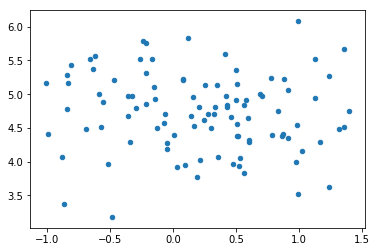

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Utilize the pandas to arrange the dataset when we processing!
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

# Utilize make_blobs to generate to dataset randomly
# make cluster_std = 0.6 to make data dispersed
coord, cluster = make_blobs(n_samples=100,centers=1,cluster_std=0.6,center_box=(-5.0, 5.0),shuffle=True)

# Show the dataset with pyplot
plt.scatter(coord[:, 0], coord[:, 1], s=20);

In [2]:
# Check the coordinates of dataset
pd.DataFrame(coord).rename(index=str, columns={0:'x',1:'y'})

,x,y
0,-0.051153,4.186555
1,-0.589387,4.999012
2,-0.637784,5.375818
3,1.122583,5.516708
4,0.256168,5.136458
5,1.394628,4.755716
6,1.353078,4.510594
7,-0.212216,4.859673
8,-0.128766,4.498556
9,0.077246,5.203358


# Simplily Implement K-mean(Main implementation is at next cell)

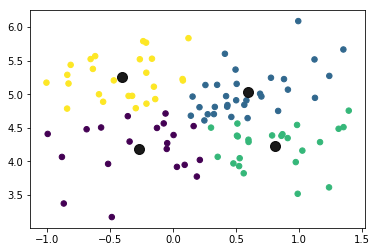

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(coord)
y_kmeans = kmeans.predict(coord)

plt.scatter(coord[:, 0], coord[:, 1], c=y_kmeans, s=30)
each_center = kmeans.cluster_centers_
plt.scatter(each_center[:, 0], each_center[:, 1], c='black', s=100, alpha=0.9);

# Testing implementation

In [4]:
All_testing_result = []
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(coord)
    y_kmeans = kmeans.predict(coord)
    
    x = np.array(coord[:, 0])
    y = np.array(coord[:, 1])
    label = np.array(y_kmeans)
    sub_sse = np.array([kmeans.inertia_]*100)
    sub_clu = np.array([i]*100)
    
    centers = kmeans.cluster_centers_
    each_belonging_center = [centers[l] for l in label]
    
    dataset = pd.DataFrame({'numberOfClusters':sub_clu,'x': x, 'y': y, 'label':label, 'each_belonging_center':each_belonging_center,'sse':sub_sse}, columns=['numberOfClusters','x','y','label','each_belonging_center','sse'])
    
    All_testing_result.append(dataset)
    
    #get and save SSE
    SSE.append(kmeans.inertia_)

## -->You can check all results through the attribute "All_testing_result"

In [5]:
cluster_number = 5
All_testing_result[cluster_number]

,numberOfClusters,x,y,label,each_belonging_center,sse
0,6,-0.051153,4.186555,0,"[-0.243663510046, 3.90981709014]",15.139445
1,6,-0.589387,4.999012,4,"[-0.373612931672, 4.73839888277]",15.139445
2,6,-0.637784,5.375818,2,"[-0.489670734201, 5.46266009853]",15.139445
3,6,1.122583,5.516708,1,"[0.973080073406, 5.3404613762]",15.139445
4,6,0.256168,5.136458,5,"[0.389253222068, 4.8479818045]",15.139445
5,6,1.394628,4.755716,1,"[0.973080073406, 5.3404613762]",15.139445
6,6,1.353078,4.510594,3,"[0.815648158247, 4.18362635937]",15.139445
7,6,-0.212216,4.859673,4,"[-0.373612931672, 4.73839888277]",15.139445
8,6,-0.128766,4.498556,4,"[-0.373612931672, 4.73839888277]",15.139445
9,6,0.077246,5.203358,5,"[0.389253222068, 4.8479818045]",15.139445


# Show SSE curve

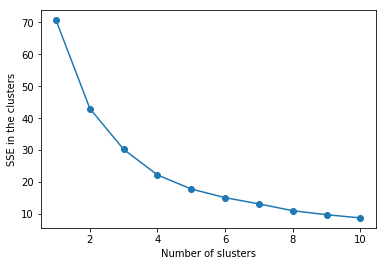

In [6]:
plt.plot(range(1,11),SSE,marker="o")
plt.xlabel("Number of slusters")
plt.ylabel("SSE in the clusters")
plt.show()
